### Programming Assignment 4 
# **Support Vector Machine**

AJ Dave A. Obis and Juan Francis C. Tuatis

In [1]:
## Import liblaries need for the exercise
import sklearn.datasets
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

# **General Guidelines**
## 1. Load the dataset using sklearn.datasets.load_breast_cancer().

In [2]:
bc_dataset = sklearn.datasets.load_breast_cancer()
print(bc_dataset.keys())

# Convert the data to DataFrame
bc_df = pd.DataFrame(bc_dataset['data'])

# Map feature_names to the DataFrame 
bc_df.columns = bc_dataset['feature_names']

display(bc_df.head())
bc_df.shape
bc_df.info()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
# Obtain the Target DataFrame
targets = bc_dataset['target']
display(targets)
print(bc_dataset['target_names'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

['malignant' 'benign']


## 2. Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained (use stratify = y in train_test_split)

In [4]:
# Split the dataset into 70-30
X_train, X_test, y_train, y_test = train_test_split(bc_df, targets, test_size = 0.30, stratify=targets, random_state=10)

## 3. Preprocess the data: Use StandardScaler to normalize feature values.

In [5]:
# Set StandardScaler()
scaler = StandardScaler()

# Normalize the values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train and SVM model using sklearn.svm.SVC with default parameters.

In [6]:
# Initialize model with default parameters
svc = SVC()

# Train the model
svc.fit(X_train_scaled, y_train)

SVC()

## 5. Perform Hyperparameter Tuning using GridSearchCV to optimize: C (Regularization parameter), Gamma (Kernel coefficient for RBF), and Kernel type (linear, rbf, poly).

In [7]:
# Define the grid parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters found: {best_params}")

Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


## 6. Evaluate the trained model:
### • Compute training and testing accuracy

In [8]:
# Compute for training and testing accuracy
best_svc = grid_search.best_estimator_
train_accuracy = best_svc.score(X_train_scaled, y_train)
test_accuracy = best_svc.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.25%
Testing Accuracy: 96.49%


### • Identify the most important features using SelectFromModel.

We tried to identify the most important features using SelectFromModel but an error occurs because SVC with the RBF kernel does not have coef_ or feature_importances_ attributes, which are required by SelectFromModel. To find the most important features, we used a linear SVM instead.

In [9]:
svc_linear = SVC(kernel='linear')  
svc_linear.fit(X_train_scaled, y_train)  

# Select important features
selector = SelectFromModel(svc_linear, prefit=True)  
important_features = bc_df.columns[selector.get_support()]

# Print selected features
print("\nMost Important Features identified by SelectFromModel:")
for feature in important_features:
    print(f"• {feature}")



Most Important Features identified by SelectFromModel:
• mean area
• mean concavity
• radius error
• perimeter error
• area error
• compactness error
• fractal dimension error
• worst radius
• worst texture
• worst perimeter
• worst area
• worst smoothness
• worst concavity


### • Generate a confusion matrix and calculate: F1-score, Precision, Recall, and False Alarm Rate

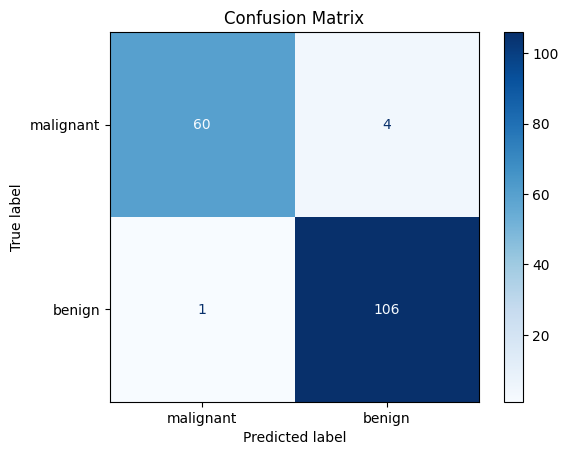


Precision: 0.9636
Recall: 0.9907
F1-score: 0.9770
False Alarm Rate: 0.0625


In [10]:
# Predict on the test set
y_pred = svc_linear.predict(X_test_scaled)  # Use your trained model

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=bc_dataset['target_names'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_mat.ravel()

# Calculate metrics
precision = TP / (TP + FP)  # Precision = TP / (TP + FP)
recall = TP / (TP + FN)  # Recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)  # F1-score formula
false_alarm_rate = FP / (FP + TN)  # False Alarm Rate = FP / (FP + TN)

# Print calculated metrics
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")

# **Guide Questions**
## 1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?

>Answer: In our case, the dataset has no missing values, hence no need to perform preprocessing like imputation. The primary preprocessing that was done was feature scaling. StandardScaler was used to normalize the feature values, therefore ensuring that all features were scaled to a common scale. This is necessary because Support Vector Machines (SVM) are scale-sensitive. Normalizing the data enhances the model's performance because each feature is given equal weight in the classification model.

## 2. Why is it necessary to split the dataset into training and testing sets?

>Answer: It is necessary to split the dataset into training and testing sets to ensure that the model is tested on unseen data during training, which will helps us prevent overfitting. The training set is used to train the model, and the test set simulates real data, so the model's generalization to new data is tested. Furthermore, the stratified sampling maintains the class distribution (benign or malignant) in both sets, ensuring that the testing is unbiased and reflects the real performance of the model.

## 3. What is the role of StandardScaler in SVM training?

>Answer: As mentioned before, SVM training are scale-sensitive and if features are not scaled equally, the model may favor features with higher values which can result to biased predictions. StandardScaler normalizes feature data by distributing them at zero as the center and scaling them to unit variance. This provides equal leverage for all features to affect the decision boundary, thus stabilizing the model and enhancing its performance during training. It essentially transforms the data so that the SVM is able to identify the optimal separating hyperplane.

## 4. How does C affect the performance of an SVM model?

>Answer: The C parameter in SVM controls the balance between error minimization on the training set and the maximum generalizable margin. A high value of C is used when you want to minimize training error, resulting in a lower generalization margin and may cause overfitting if the model accommodates the noise in the data too much. A low value of C is used when you want the model to maximize the margin even though having some error on some points, thus generalizing well. C value is crucial for the model's optimization of bias and variance.

## 5. What is the purpose of the kernel function in SVM?

>Answer: The kernel function in Support Vector Machines (SVM) allows easy processing of non-linearly separable data by projecting the input features into a higher-dimensional space. This projection allows the SVM to determine a linear hyperplane that can be used to separate the data, even if the separation cannot be achieved within the original feature space. Linear, polynomial (poly), and radial basis function (RBF) are the some of the commonly used kernel types. In a way, the kernel function allows the SVM to learn more complex decision boundaries and classify data that would be hard to differentiate using a linear approach.

## 6. What were the best hyperparameters found using GridSearchCV?

>Answer: From the previous steps, the best hyperparameters found using GridSearchCV were C as 10, Gamma set to 'scale', and a Kernel of 'rbf'.

## 7. What is a confusion matrix, and how is it interpreted? 

>Answer: A confusion matrix is a table to represent the performance of a classification model like SVM. It is used to compare the predicted outputs with the actual result. The matrix generally has four important values such as True Positives (TP) which correctly predicted positive outcomes(malignant tumors predicted as malignant), True Negatives(TN) which correctly predicted negative outcomes(benign tumors predicted as benign), False Positives(FP) having negative instances mistakenly predicted as positive(benign tumors predicted as malignant), and False Negatives(FN) having positive instances mistakenly predicted as negative(malignant tumors predicted as benign). With these values, we can determine different performance scores, such as accuracy, precision, recall, and F1-score, which help us determine how good the model is separating the classes.

## 8. How are Precision, Recall, and F1-score calculated from the confusion matrix?

>Answer: Precicion, Recall, and F1-score are calculated from the values obtained from the confusion matrix. They can be computed by using the following formulas:

> TP = True Positives; FP = False Positives; FN = False Negatives

>Precision = TP / (TP + FP)

>Recall = TP / (TP + FN)

>F1-score = 2 × (Precision × Recall) / (Precision + Recall)

## 9. If the model does not perform well, what adjustments can be made to improve it?

>Answer: If the model does not perform well, several adjustments can be done such as feature scaling, which we did before, and removing irrelevant features to help improve the performance. Making sure that hyperparameter tuning and GridSearch is done has a high impact to improve the model performance to optimize parameters such as C, Gamma, and Kernel that will be used. If the data is imbalanced with their classes, methods like SMOTE (Synthetic Minority Over-sampling Technique) or tuning class weights can be useful. Moreover, having more data samples the better the model will be able to generalize. Having these some techniques applied, we can tune the SVM model for higher reliability and performance.